# Learning with Subset Stacking (LESS)

LESS is a new supervised learning algorithm that is based on training many local estimators on subsets of a given dataset, and then passing their predictions to a global estimator. This is, of course, a very rough description. In the second part of this tutorial, we will give more details about the inner workings of LESS and discuss how to change its many parameters to obtain different models. But for now, let us carry on with the default LESS and show that it works just fine out-of-the-box.

Here is a simple one-dimensional regression problem. This synthetic data set is generated by randomly sampling a set of points from the real line (input) and then adding perturbations to their function values obtained with a sine curve (output). The blue dots in the figure below shows the dataset with 200 samples.

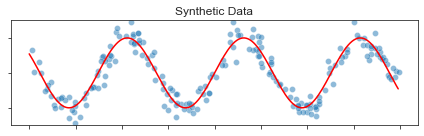

In [1]:
import lesstutorial as lt
X, y = lt.synthetic_sine_curve(n_samples=200)

You will notice that LESS uses exactly the same syntax (fit & predict) that is used by all the learning algorithms in `scikit-learn`. Here is how LESS performs on the synthetic problem. Currently, LESS only supports regression. We are currently working on adding a LESS classifier.

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from less import LESSRegressor

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3)

LESS_model = LESSRegressor()
LESS_model.fit(X_train, y_train)
y_pred = LESS_model.predict(X_test)
print('Test error of LESS: {0:.2f}'.format(mean_squared_error(y_pred, y_test)))

Test error of LESS: 7.39


We can also compare the results of against a collection of different regressors from `sklearn.`

In [3]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.kernel_ridge import KernelRidge
from sklearn.gaussian_process import GaussianProcessRegressor

models = [LESSRegressor(), RandomForestRegressor(), AdaBoostRegressor(),
          KNeighborsRegressor(), DecisionTreeRegressor(), SVR(),
          MLPRegressor(max_iter=50000), LinearRegression(),
          KernelRidge(kernel='rbf'), GaussianProcessRegressor()]

for model in models:
    print('Test error of {0} : {1:.2f}'.format(str(model),
        mean_squared_error(model.fit(X_train, y_train).
            predict(X_test), y_test)))

Test error of LESSRegressor() : 7.91
Test error of RandomForestRegressor() : 9.26
Test error of AdaBoostRegressor() : 9.21
Test error of KNeighborsRegressor() : 8.18
Test error of DecisionTreeRegressor() : 12.79
Test error of SVR() : 48.56
Test error of MLPRegressor(max_iter=50000) : 18.47
Test error of LinearRegression() : 50.94
Test error of KernelRidge(kernel='rbf') : 6.82
Test error of GaussianProcessRegressor() : 110.40


These results show that LESS is quite competitive. We have also created a script that compares the fitted models with all the above learning algorithms. 

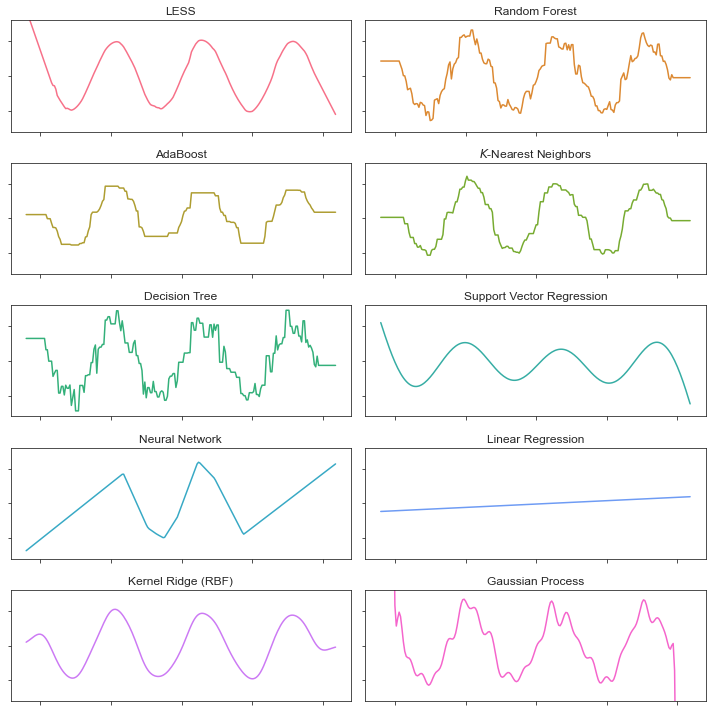

In [4]:
lt.compare_1D_plots(X_train, y_train)

Ridge Regression with RBF kernel and LESS seem to capture the underlying function well. This was also reflected in the test errors that we have seen above.

This problem was rather small. Let's try a larger problem with 4177 samples and 7 features.

In [5]:
import numpy as np
import datasetsr as DS

df = np.array(DS.abalone('../datasetsR/'))
X, y = df[:, 0:-1], df[:, -1]

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3)

for model in models:
    print('Test error of {0} : {1:.2f}'.format(str(model),
        mean_squared_error(model.fit(X_train, y_train).
            predict(X_test), y_test)))

Test error of LESSRegressor() : 4.19
Test error of RandomForestRegressor() : 4.60
Test error of AdaBoostRegressor() : 8.92
Test error of KNeighborsRegressor() : 4.80
Test error of DecisionTreeRegressor() : 8.95
Test error of SVR() : 4.46
Test error of MLPRegressor(max_iter=50000) : 4.45
Test error of LinearRegression() : 4.44
Test error of KernelRidge(kernel='rbf') : 4.52
Test error of GaussianProcessRegressor() : 243.56


Here is even a larger problem with more samples and more features (19735 samples, 26 features).

In [6]:
import datasetsr as DS
import numpy as np

df = np.array(DS.energy('../datasetsR/'))
X = df[:, 0:-1]
y = df[:, -1]

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3)

for model in models:
    print('Test error of {0} : {1:.2f}'.format(str(model),
        mean_squared_error(model.fit(X_train, y_train).
            predict(X_test), y_test)))

Test error of LESSRegressor() : 213.03
Test error of RandomForestRegressor() : 248.64
Test error of AdaBoostRegressor() : 212.98
Test error of KNeighborsRegressor() : 253.58
Test error of DecisionTreeRegressor() : 424.70
Test error of SVR() : 212.82
Test error of MLPRegressor(max_iter=50000) : 216.58
Test error of LinearRegression() : 213.08
Test error of KernelRidge(kernel='rbf') : 560.47
Test error of GaussianProcessRegressor() : 734.71


When you run all these algorithms, you will notice that some of the algorithms take a long time. So, let's plot the training times.

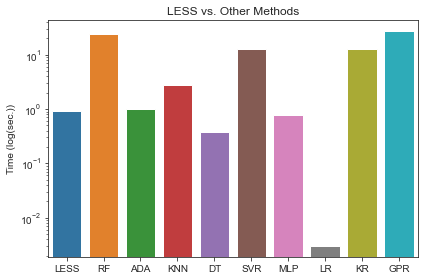

In [7]:
lt.timings(X_train, y_train)

Note that the vertical axis shows the training times in logarithmic scale of seconds. Clearly, LESS could be relatively efficient in terms of training times.

This is all to get you started with LESS. If you want to learn more, then please proceed to the [second part of this tutorial](./Tutorial02.ipynb).